<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Desafío - Inferencia e Hipótesis</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="font-size:15px;">En este desafío validaremos nuestros conocimientos de estadística inferencial. Para lograrlo, realizarás inferencias y pruebas de hipótesis a partir de la base de datos earnings.csv.<br>
Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>
<span style="font-size:15px;">Podemos registrar muchas características de una persona, y buscar ver si algunas influyen o no en otras. Realiza las siguientes actividades para verificarlo.<br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.a</span>
<span style="font-size:15px;">Considerando las variables earn, height y age, vamos a suponer que nuestro dataset fuera una población completa. (Prepara los datos adecuadamente).<br>
Realiza 12 pruebas (4 por cada variable) con muestras de tamaño n = 25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del ...%, se acepta la hipótesis nula/alternativa".</span><br>

![desafio12ENE25.png](desafio12ENE25.png)

In [98]:
# Se importa librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from scipy.stats import norm
from scipy import stats
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
# Se lee el archivo csv: earnings.csv
df = pd.read_csv('/Users/marce/Projects_Marce/Desafio_Latam/earnings.csv', delimiter = ',')

In [100]:
# Buena práctica: se da una mirada a las primeras filas del DataFrame y las columnas que lo conforman
print(df.head())

   height  weight  male     earn  earnk ethnicity  education  \
0      74   210.0     1  50000.0   50.0     White       16.0   
1      66   125.0     0  60000.0   60.0     White       16.0   
2      64   126.0     0  30000.0   30.0     White       16.0   
3      65   200.0     0  25000.0   25.0     White       17.0   
4      63   110.0     0  50000.0   50.0     Other       16.0   

   mother_education  father_education  walk  exercise  smokenow  tense  angry  \
0              16.0              16.0     3         3       2.0    0.0    0.0   
1              16.0              16.0     6         5       1.0    0.0    0.0   
2              16.0              16.0     8         1       2.0    1.0    1.0   
3              17.0               NaN     8         1       2.0    0.0    0.0   
4              16.0              16.0     5         6       2.0    0.0    0.0   

   age  
0   45  
1   58  
2   29  
3   57  
4   91  


##### <span style="font-size:15px;">Se observan 15 columnas</span>

In [103]:
# Buena práctica: se observa el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB


In [105]:
# Se determinan valores nulos
df.apply(lambda x: sum(x.isnull()), axis=0)

height                0
weight               27
male                  0
earn                  0
earnk                 0
ethnicity             0
education             2
mother_education    244
father_education    295
walk                  0
exercise              0
smokenow              1
tense                 1
angry                 1
age                   0
dtype: int64

<span style="font-size:15px;">Se observa que 14 de las 15 columnas son del tipo de dato float64 ó int64. Sólo 1 columna es tipo ojbect [15 columnas].
Se observa que 8 columnas tienen 1.816 registros no nulos</span>

In [108]:
# Buena práctica: se genera un resumen estadístico para las 14 columnas numéricas con df.describe()
df.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


<span style="font-size:15px;">Sin haber realizado limpieza de datos, tomando en cuenta sólo los 3 campos de la pregunta 1.a:<br>
[1] la altura [height] promedio es 66,6<br>
[2] la ganancia [earn] promedio es 21.147,3<br>
[3] la edad promedio es 42,9
</span>

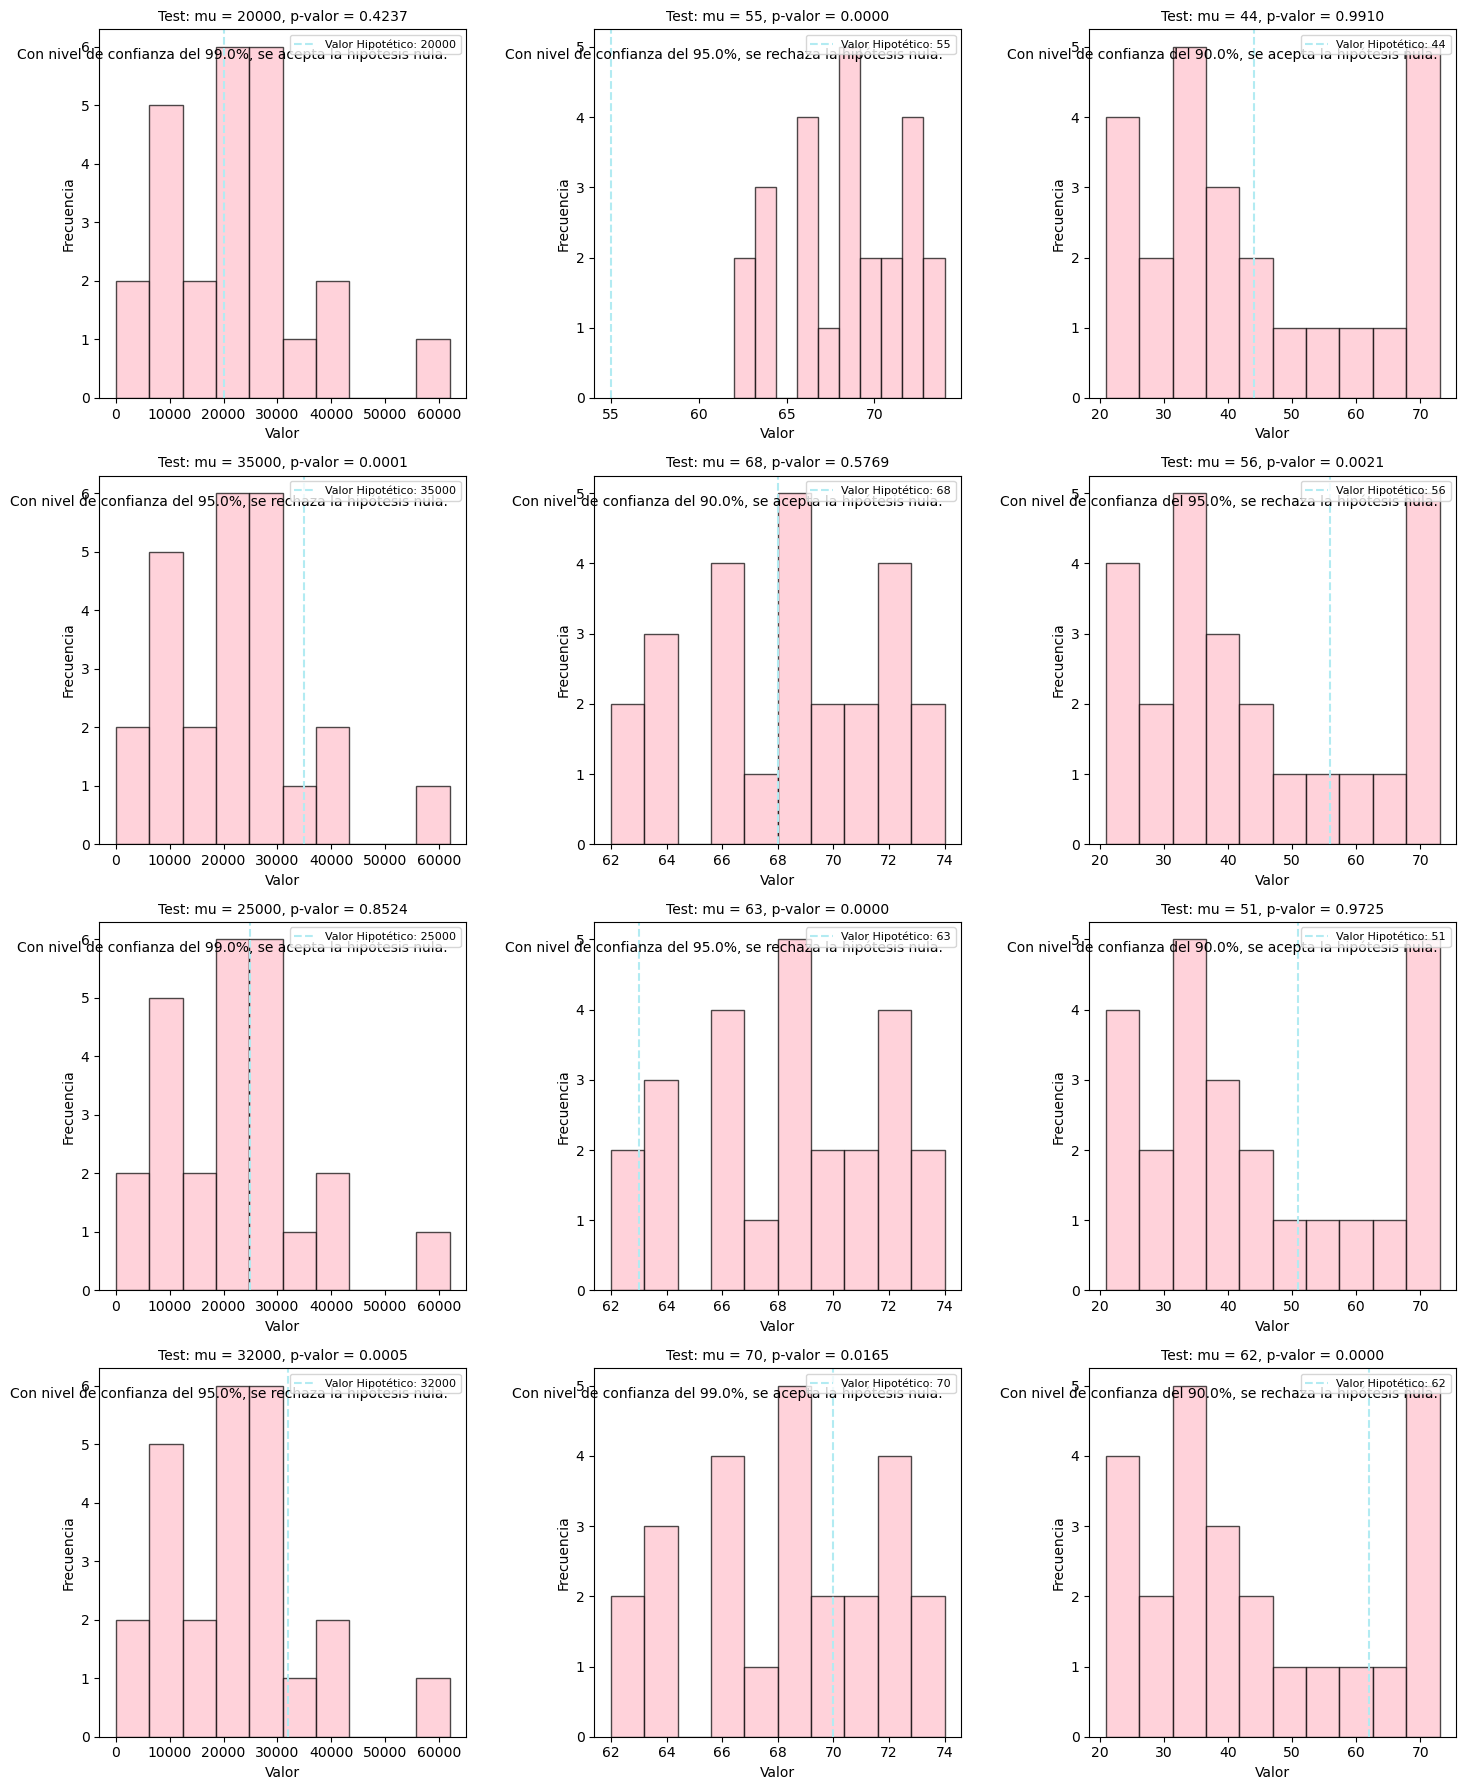

Prueba con mu = 20000, alpha = 0.01:
Estadístico t: 0.8139, p-valor: 0.4237
Con nivel de confianza del 99.0%, se acepta la hipótesis nula.
--------------------------------------------------------------------------------
Prueba con mu = 55, alpha = 0.05:
Estadístico t: 18.9505, p-valor: 0.0000
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula.
--------------------------------------------------------------------------------
Prueba con mu = 44, alpha = 0.1:
Estadístico t: -0.0115, p-valor: 0.9910
Con nivel de confianza del 90.0%, se acepta la hipótesis nula.
--------------------------------------------------------------------------------
Prueba con mu = 35000, alpha = 0.05:
Estadístico t: -4.8385, p-valor: 0.0001
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula.
--------------------------------------------------------------------------------
Prueba con mu = 68, alpha = 0.1:
Estadístico t: 0.5657, p-valor: 0.5769
Con nivel de confianza del 90.0%, se acepta la hip

In [111]:
# Definir la paleta de colores
custom_palette = ["#FFC0CB", "#B2EBF2"]

# Función para realizar una prueba t de hipótesis
def test_hypothesis(data, mu, alternative='two-sided', alpha=0.05):
    # Realizar prueba t de Student para una muestra
    t_stat, p_value = stats.ttest_1samp(data, mu)
    
    # Ajuste del p-valor dependiendo del tipo de alternativa
    if alternative == 'greater':
        p_value = p_value / 2 if np.mean(data) > mu else 1 - p_value / 2
    elif alternative == 'less':
        p_value = p_value / 2 if np.mean(data) < mu else 1 - p_value / 2

    # Determinamos si rechazamos la hipótesis nula
    if p_value < alpha:
        result = f"Con nivel de confianza del {(1 - alpha) * 100}%, se rechaza la hipótesis nula."
    else:
        result = f"Con nivel de confianza del {(1 - alpha) * 100}%, se acepta la hipótesis nula."
    
    return result, t_stat, p_value

# Muestras aleatorias de tamaño 25 para cada variable
earn_sample = df['earn'].sample(n=25, random_state=42)
height_sample = df['height'].sample(n=25, random_state=42)
age_sample = df['age'].sample(n=25, random_state=42)

# Valores y alternativas
test_cases = [
    {'data': earn_sample, 'mu': 20000, 'alternative': 'two-sided', 'alpha': 0.01},  # H0: x = 20000, H1: x ≠ 20000
    {'data': height_sample, 'mu': 55, 'alternative': 'two-sided', 'alpha': 0.05},   # H0: x = 55, H1: x ≠ 55
    {'data': age_sample, 'mu': 44, 'alternative': 'two-sided', 'alpha': 0.1},      # H0: x = 44, H1: x ≠ 44
    {'data': earn_sample, 'mu': 35000, 'alternative': 'two-sided', 'alpha': 0.05},  # H0: x = 35000, H1: x ≠ 35000
    {'data': height_sample, 'mu': 68, 'alternative': 'two-sided', 'alpha': 0.1},    # H0: x = 68, H1: x ≠ 68
    {'data': age_sample, 'mu': 56, 'alternative': 'two-sided', 'alpha': 0.05},      # H0: x = 56, H1: x ≠ 56
    {'data': earn_sample, 'mu': 25000, 'alternative': 'greater', 'alpha': 0.01},    # H0: x = 25000, H1: x > 25000
    {'data': height_sample, 'mu': 63, 'alternative': 'greater', 'alpha': 0.05},     # H0: x = 63, H1: x > 63
    {'data': age_sample, 'mu': 51, 'alternative': 'greater', 'alpha': 0.1},         # H0: x = 51, H1: x > 51
    {'data': earn_sample, 'mu': 32000, 'alternative': 'less', 'alpha': 0.05},       # H0: x = 32000, H1: x < 32000
    {'data': height_sample, 'mu': 70, 'alternative': 'less', 'alpha': 0.01},        # H0: x = 70, H1: x < 70
    {'data': age_sample, 'mu': 62, 'alternative': 'less', 'alpha': 0.1}             # H0: x = 62, H1: x < 62
]

# Realizar las pruebas y mostrar resultados gráficamente
fig, axes = plt.subplots(4, 3, figsize=(15, 18))
axes = axes.ravel()

for i, test_case in enumerate(test_cases):
    # Realizar la prueba
    result, t_stat, p_value = test_hypothesis(
        test_case['data'], test_case['mu'], test_case['alternative'], test_case['alpha']
    )
    
    # Graficar el histograma para cada muestra
    axes[i].hist(test_case['data'], bins=10, color=custom_palette[0], edgecolor='black', alpha=0.7)
    axes[i].axvline(test_case['mu'], color=custom_palette[1], linestyle='--', label=f"Valor Hipotético: {test_case['mu']}")
    
    axes[i].set_title(f"Test: mu = {test_case['mu']}, p-valor = {p_value:.4f}", fontsize=10)
    axes[i].legend(loc='upper right', fontsize=8)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    
    # Mostrar el resultado de la prueba en el gráfico
    axes[i].text(0.95, 0.95, result, ha='right', va='top', transform=axes[i].transAxes, fontsize=10, color='black')

# Agregar los resultados como párrafos al final de la visualización
plt.tight_layout()
plt.show()

# Párrafos con los resultados de las pruebas
for i, test_case in enumerate(test_cases):
    result, t_stat, p_value = test_hypothesis(
        test_case['data'], test_case['mu'], test_case['alternative'], test_case['alpha']
    )
    
    print(f"Prueba con mu = {test_case['mu']}, alpha = {test_case['alpha']}:")
    print(f"Estadístico t: {t_stat:.4f}, p-valor: {p_value:.4f}")
    print(result)
    print("-" * 80)


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.b.</span>
<span style="font-size:15px;">Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas?
</span><br>

In [114]:
# Calcular la media poblacional para cada variable
mean_earn = df['earn'].mean()
mean_height = df['height'].mean()
mean_age = df['age'].mean()

# Mostrar los resultados
print(f"Media poblacional de 'earn': {mean_earn:.2f}")
print(f"Media poblacional de 'height': {mean_height:.2f}")
print(f"Media poblacional de 'age': {mean_age:.2f}")


Media poblacional de 'earn': 21147.30
Media poblacional de 'height': 66.57
Media poblacional de 'age': 42.93


<span style="font-size:15px;">Los resultados de las pruebas sí son correctos. Por ejemplo en la prueba con mu=20.000 alpha=0,01 el p-valor=0,4237  es mayor que alpha lo que significa que se acepta la hipótesis nula. Así la media de la muestra es consistente con la media poblacional</span><br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">Crea una función que estime la proporción de hombres en el dataset, considerando una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con palabras tus resultados ejecutar la función e interpreta. Compara con la proporción real.
</span><br>

In [118]:
# Estimar la proporción real de hombres
proporcion_real_hombres = df['male'].mean()

# Función para realizar la prueba de hipótesis para la proporción
def estimar_proporcion_hombres(muestra_size=50, alpha_values=[0.05, 0.01]):
    # Tomar una muestra aleatoria de 50 individuos
    muestra = df['male'].sample(n=muestra_size, random_state=42)
    
    # Calcular la proporción de hombres en la muestra
    proporcion_muestra = muestra.mean()
    
    # Calcular la desviación estándar de la proporción muestral (error estándar)
    n = muestra_size
    p_0 = proporcion_real_hombres
    std_error = np.sqrt((p_0 * (1 - p_0)) / n)
    
    # Realizar la prueba de hipótesis para la proporción (prueba Z)
    z_score = (proporcion_muestra - p_0) / std_error
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Prueba bilateral
    
    # Resultados de las pruebas para diferentes niveles de significancia
    resultados = []
    for alpha in alpha_values:
        if p_value < alpha:
            resultado = f"Con nivel de significancia {alpha*100}%: Se rechaza la hipótesis nula, la proporción muestral es significativamente diferente."
        else:
            resultado = f"Con nivel de significancia {alpha*100}%: Se acepta la hipótesis nula, no hay suficiente evidencia para rechazarla."
        resultados.append(resultado)
    
    return proporcion_muestra, p_value, resultados

# Ejecutar la función
proporcion_muestra, p_value, resultados = estimar_proporcion_hombres()

# Mostrar los resultados
print(f"Proporción real de hombres en el dataset: {proporcion_real_hombres:.4f}")
print(f"Proporción de hombres en la muestra de 50 individuos: {proporcion_muestra:.4f}")
print(f"p-valor de la prueba de hipótesis: {p_value:.4f}")
print("\nResultados de las pruebas de hipótesis:")
for res in resultados:
    print(res)


Proporción real de hombres en el dataset: 0.3717
Proporción de hombres en la muestra de 50 individuos: 0.5400
p-valor de la prueba de hipótesis: 0.0138

Resultados de las pruebas de hipótesis:
Con nivel de significancia 5.0%: Se rechaza la hipótesis nula, la proporción muestral es significativamente diferente.
Con nivel de significancia 1.0%: Se acepta la hipótesis nula, no hay suficiente evidencia para rechazarla.


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">3.</span>
<span style="font-size:15px;">Considerando el dataset como una muestra, verifica si el género (male=1 significa ‘hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu procedimiento.</span><br>

In [121]:
# Separar los datos en dos grupos: hombres y mujeres
hombres = df[df['male'] == 1]['earn']
mujeres = df[df['male'] == 0]['earn']

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)  # Asumimos varianzas diferentes

# Imprimir resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'p-valor: {p_value:.4f}')

# Verificar la hipótesis
alpha = 0.05
if p_value < alpha:
    print(f"Con nivel de confianza del {100 * (1 - alpha)}%, se rechaza la hipótesis nula. El género influye sobre el sueldo.")
else:
    print(f"Con nivel de confianza del {100 * (1 - alpha)}%, no se rechaza la hipótesis nula. El género no influye sobre el sueldo.")


Estadístico t: 11.8646
p-valor: 0.0000
Con nivel de confianza del 95.0%, se rechaza la hipótesis nula. El género influye sobre el sueldo.


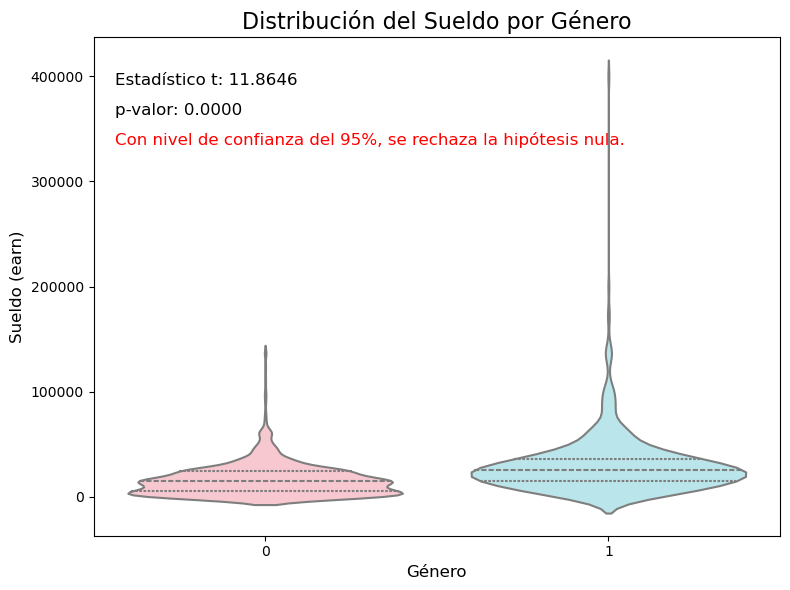

In [123]:
# Definir la paleta de colores personalizada
custom_palette = ["#FFC0CB", "#B2EBF2"]

# Separar los datos en dos grupos: hombres y mujeres
df['male'] = df['male'].astype(int)  # Asegurarnos de que la columna male sea de tipo entero
hombres = df[df['male'] == 1]['earn']
mujeres = df[df['male'] == 0]['earn']

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)  # Asumimos varianzas diferentes

# Graficar usando un violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="male", y="earn", data=df, palette=custom_palette, inner="quart", linewidth=1.5)

# Agregar título y etiquetas
plt.title("Distribución del Sueldo por Género", fontsize=16)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Sueldo (earn)", fontsize=12)

# Mostrar resultados de la prueba t en el gráfico
plt.figtext(0.15, 0.85, f'Estadístico t: {t_stat:.4f}', fontsize=12, color='black')
plt.figtext(0.15, 0.80, f'p-valor: {p_value:.4f}', fontsize=12, color='black')

# Resultado de la hipótesis
alpha = 0.05
if p_value < alpha:
    plt.figtext(0.15, 0.75, "Con nivel de confianza del 95%, se rechaza la hipótesis nula.", fontsize=12, color='red')
else:
    plt.figtext(0.15, 0.75, "Con nivel de confianza del 95%, no se rechaza la hipótesis nula.", fontsize=12, color='green')

# Ajustar el gráfico para que no se sobrepongan los textos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
